# ResNet50 Model | CIFAKE


In [12]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.applications import ResNet50
from keras.optimizers import Adam
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [13]:
model_name = "resnet_model_cifake"
dataset_base_path = "./datasets/CIFAKE"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [14]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

Model/history not found.


In [15]:
# Building model
if not model_history_loaded:
    classifier = build_sequential_model(
        layers=[
            ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3)),
            GlobalAveragePooling2D(),
            Dense(1024, "relu"),
            BatchNormalization(),
            Dense(512, "relu"),
            BatchNormalization(),
            Dense(256, "relu"),
            BatchNormalization(),
            Dropout(0.2),
            Dense(2, "softmax"),
        ],
        optimizer=Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

In [16]:
# Model summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_4 (Batc  (None, 512)             

In [17]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [18]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/10
10000/10000 [==============================] - 314s 31ms/step - loss: 0.6711 - accuracy: 0.6030 - val_loss: 1.1330 - val_accuracy: 0.7390
Epoch 2/10
10000/10000 [==============================] - 312s 31ms/step - loss: 0.5670 - accuracy: 0.7055 - val_loss: 4.8414 - val_accuracy: 0.5963
Epoch 3/10
10000/10000 [==============================] - 312s 31ms/step - loss: 0.5325 - accuracy: 0.7351 - val_loss: 1.0330 - val_accuracy: 0.8095
Epoch 4/10
10000/10000 [==============================] - 312s 31ms/step - loss: 0.4816 - accuracy: 0.7687 - val_loss: 0.5283 - val_accuracy: 0.7652
Epoch 5/10
10000/10000 [==============================] - 311s 31ms/step - loss: 0.4494 - accuracy: 0.7952 - val_loss: 8.0959 - val_accuracy: 0.4019
Epoch 6/10
10000/10000 [==============================] - 311s 31ms/step - loss: 0.4978 - accuracy: 0.7631 - val_loss: 1.0096 - val_accuracy: 0.8201
Epoch 7/10
10000/10000 [==============================] - 315s 32ms/step - loss: 0.4709 - accuracy: 0.7790

In [19]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/resnet_model_cifake/model\assets


INFO:tensorflow:Assets written to: ./models/resnet_model_cifake/model\assets


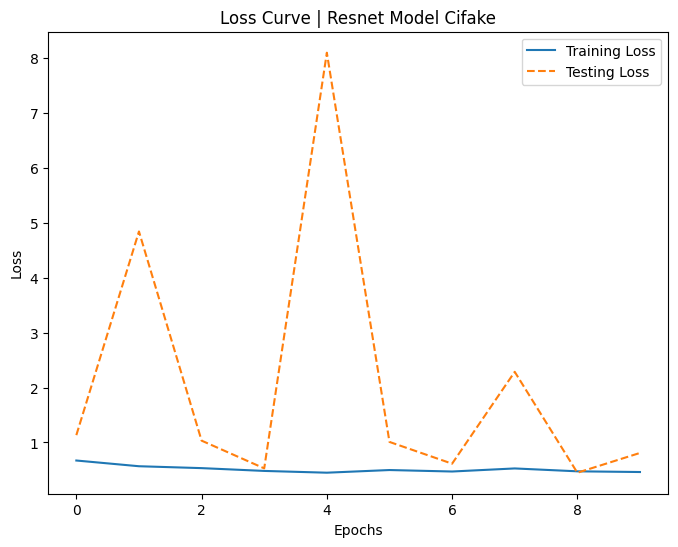

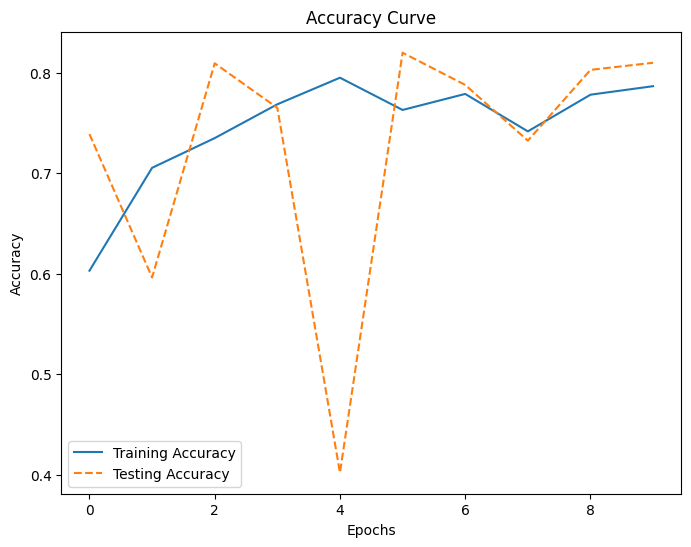

In [20]:
# Plot performance curves
plot_performance_curves(history, model_name)